# Linear Regression

Import the main libraries including Scikit-Learn and get ready to perform data analysis and Machine Learning.

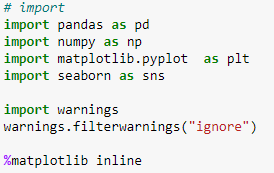

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Boston dataset

In [2]:
# The goal is to predict the value of the house in Boston using the given characteristics
# The dataset is available within Scikit-Learn.

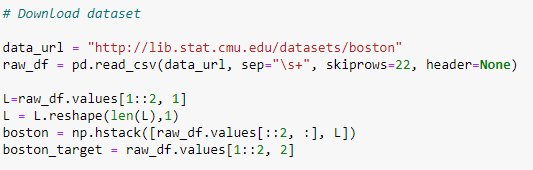

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

L = raw_df.values[1::2, 1]
L = L.reshape(len(L), 1)
boston = np.hstack([raw_df.values[::2, :], L])
boston_target = raw_df.values[1::2, 2]

#### Dataset description

#### Attribute Information (in order):

CRIM     - per capita crime rate by town

ZN       - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS    - proportion of non-retail business acres per town

CHAS     - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX      - nitric oxides concentration (parts per 10 million)

RM       - average number of rooms per dwelling

AGE      - proportion of owner-occupied units built prior to 1940

DIS      - weighted distances to five Boston employment centres

RAD      - index of accessibility to radial highways

TAX      - full-value property-tax rate per \$10,000

PTRATIO  - pupil-teacher ratio by town

LSTAT    - % lower status of the population

#### Target (answer):

MEDV     - Median value of owner-occupied homes in $1000's

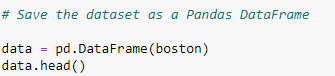

In [4]:
data = pd.DataFrame(boston)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


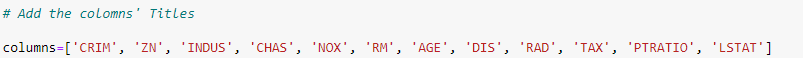

In [5]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [6]:
data = pd.DataFrame(boston, columns=columns)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


12.png

In [8]:
data.dtypes.value_counts()

float64    12
Name: count, dtype: int64

13.png

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [10]:
# It does not have any data gaps
# All columns are numerical

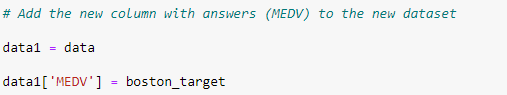

In [11]:
data1 = data
data1["MEDV"] = boston_target

15.png

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


16.png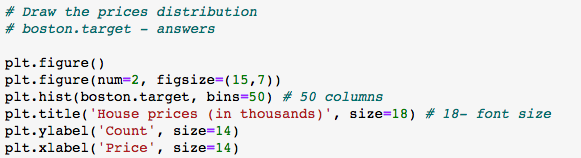

Text(0.5, 0, 'Price')

<Figure size 640x480 with 0 Axes>

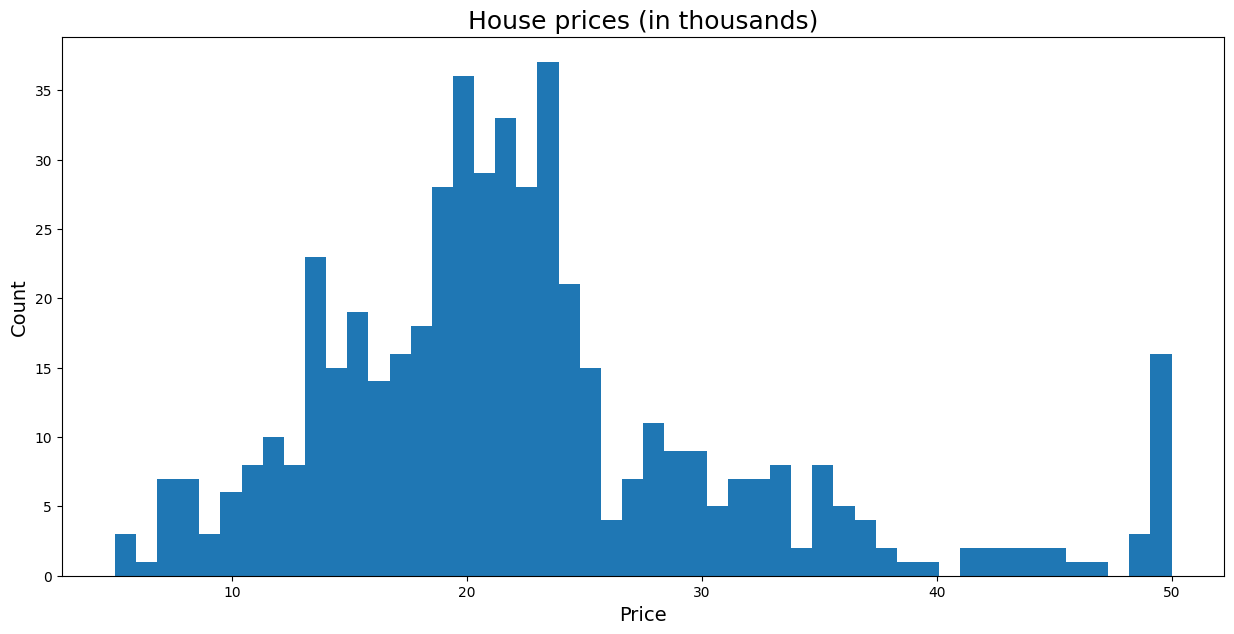

In [13]:
plt.figure()
plt.figure(num=2, figsize=(15,7))
plt.hist(boston_target, bins=50)
plt.title("House prices (in thousands)", size=18)
plt.ylabel("Count", size=14)
plt.xlabel("Price", size=14)

<Axes: >

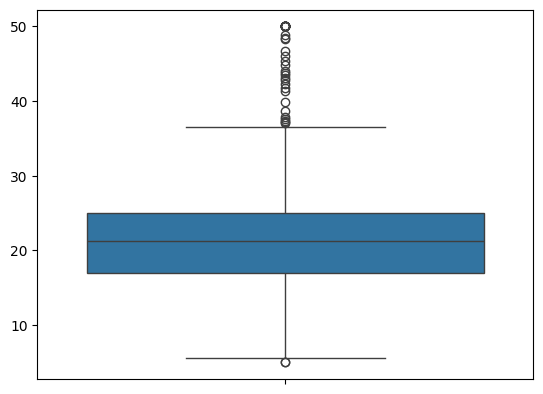

In [14]:
sns.boxplot(boston_target)

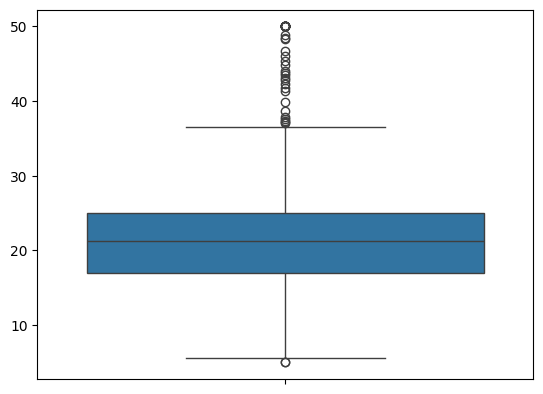

In [15]:
sns.boxplot(boston_target);

In [16]:
# If you always predict the price from 17 to 25 thousand, 
# then the model prediction accuracy is already quite good (50%).

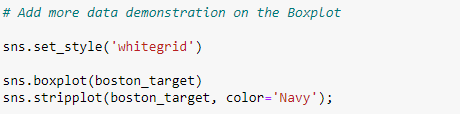

<Axes: >

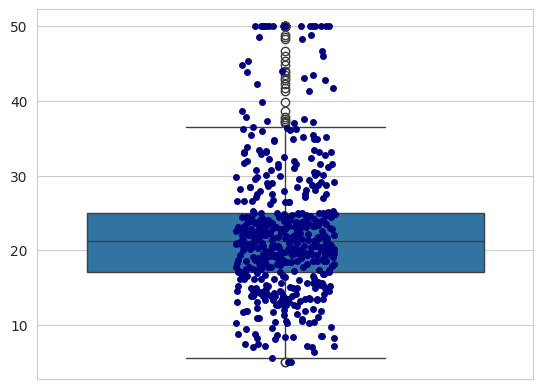

In [17]:
sns.set_style("whitegrid")
sns.boxplot(boston_target)
sns.stripplot(boston_target, color="Navy")

18.png

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

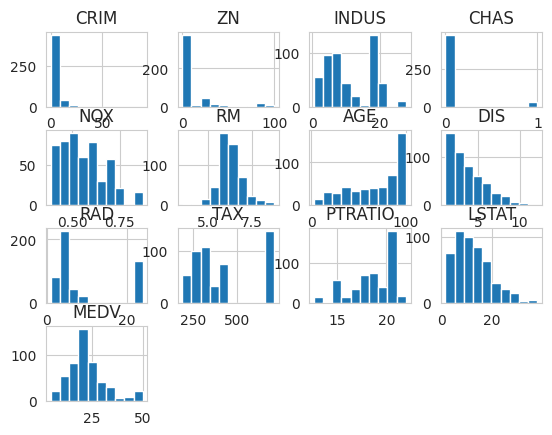

In [18]:
data1.hist()

In [19]:
# There are many correlations and the data is unevenly distributed
# It is helpful for data analysis

19.png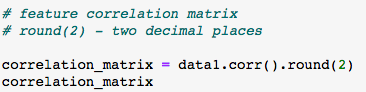

In [20]:
correlation_matrix = data1.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47


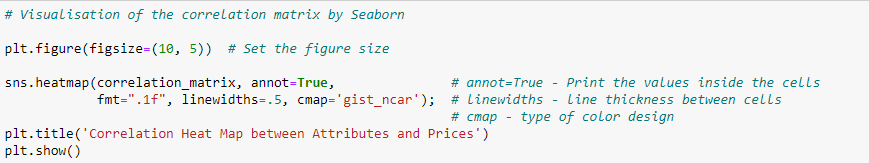

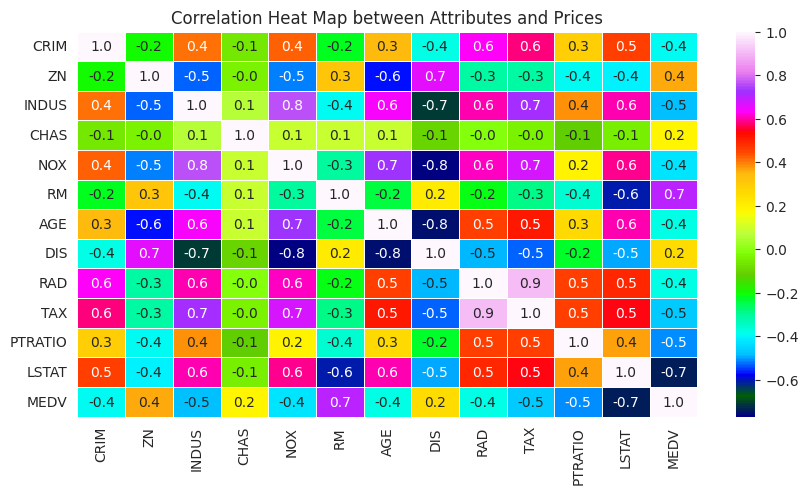

In [21]:
plt.figure(figsize=(10, 5))

sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=0.5, cmap="gist_ncar")
plt.title("Correlation Heat Map between Attributes and Prices")
plt.show()

In [22]:
# The correlation coefficient varies from -1 to 1. If the value is close to 1, this means that there 
# is a strong positive correlation between the two variables. When it is close to -1, 
# the variables have a strong negative correlation.

In [23]:
# Observations:

# strong positive correlation:
#                RM    with MEDV (0.7) 
#                LSTAT with MEDV(-0.7)


In [24]:
# print these most influential features:

21.png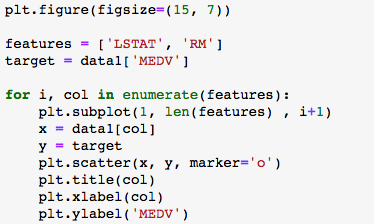

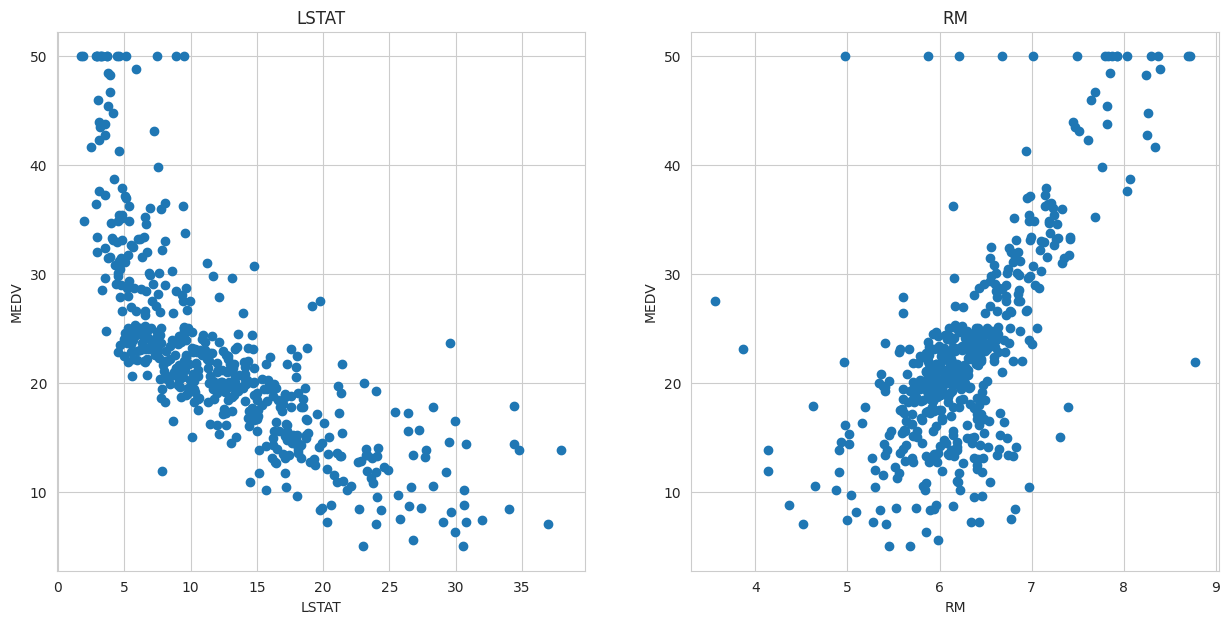

In [25]:
plt.figure(figsize=(15, 7))
features = ["LSTAT", "RM"]
target = data1['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Training

22.png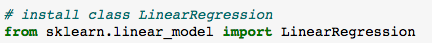

In [26]:
from sklearn.linear_model import LinearRegression

23.png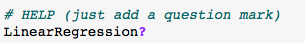

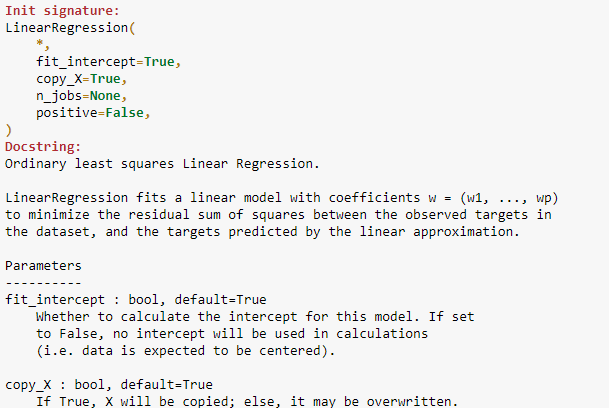

24.png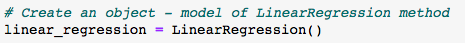

In [27]:
linear_regression = LinearRegression()

### First training without normalisation

- We feed the training data to the model and the training will begin
- %time - measure time
- boston         - inputs
- bocton_targrt  - outputs


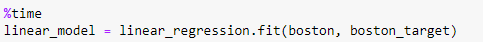

In [28]:
%time
linear_model = linear_regression.fit(boston, boston_target)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.77 μs


26.png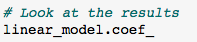

In [29]:
linear_model.coef_

array([-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,  2.83999338e+00,
       -1.87580220e+01,  3.65811904e+00,  3.61071055e-03, -1.49075365e+00,
        2.89404521e-01, -1.26819813e-02, -9.37532900e-01, -5.52019101e-01])

## Prediction

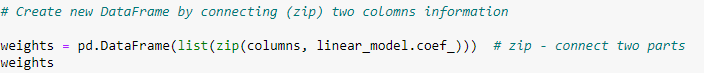

In [30]:
weights = pd.DataFrame(list(zip(columns, linear_model.coef_)))
weights

,0,1
0,CRIM,-0.121389
1,ZN,0.046963
2,INDUS,0.013468
3,CHAS,2.839993
4,NOX,-18.758022
5,RM,3.658119
6,AGE,0.003611
7,DIS,-1.490754
8,RAD,0.289405
9,TAX,-0.012682


28.png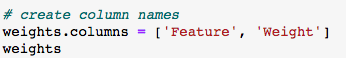

In [31]:
weights.columns = ['Feature', 'Weight']
weights

,Feature,Weight
0,CRIM,-0.121389
1,ZN,0.046963
2,INDUS,0.013468
3,CHAS,2.839993
4,NOX,-18.758022
5,RM,3.658119
6,AGE,0.003611
7,DIS,-1.490754
8,RAD,0.289405
9,TAX,-0.012682


In [32]:
#  It makes no sense to estimate the absolute values of weights since the data are not normalised

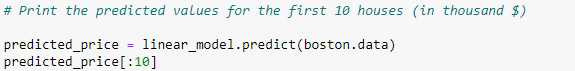

In [33]:
predicted_price = linear_model.predict(boston.data)
predicted_price[:10]

array([30.03373805, 25.05683368, 30.60818602, 28.67717948, 27.928791  ,
       25.39316857, 22.80496155, 19.19898495, 11.07897982, 18.71966912])

30.png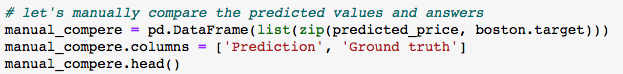

In [34]:
manual_comperee = pd.DataFrame(list(zip(predicted_price, boston_target)))
manual_comperee.columns = ['Prediction', 'Ground truth']
manual_comperee.head()

,Prediction,Ground truth
0,30.033738,24.0
1,25.056834,21.6
2,30.608186,34.7
3,28.677179,33.4
4,27.928791,36.2


### Printing the linear regression model and data graph without normalisation

31.png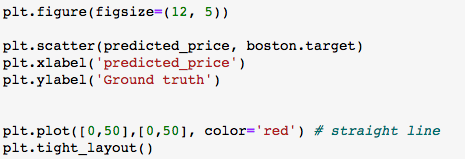

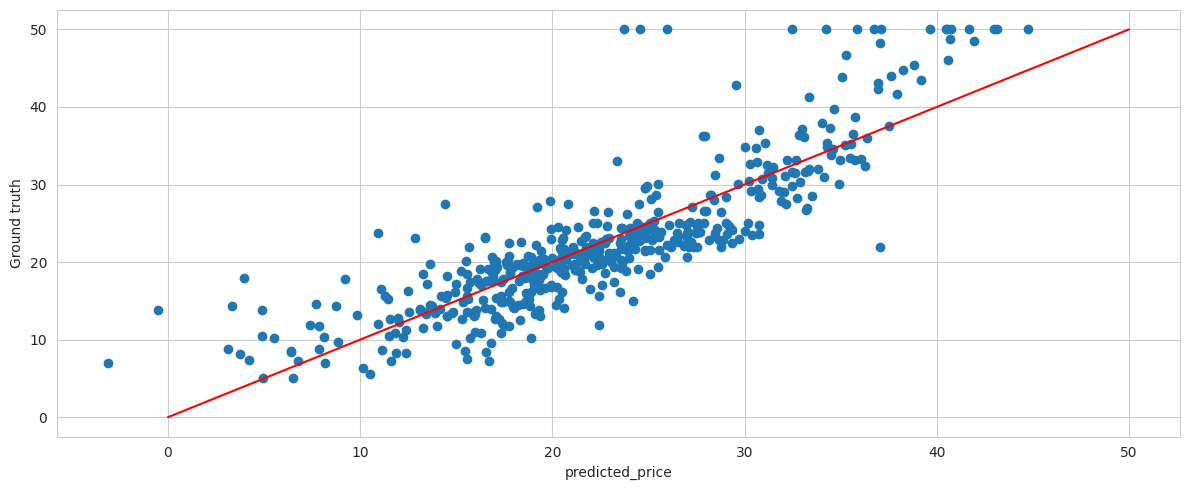

In [35]:
plt.figure(figsize=(12, 5))

plt.scatter(predicted_price, boston_target)
plt.xlabel("predicted_price")
plt.ylabel("Ground truth")


plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()

## Linear models require scaled (normalised) data 
### The most popular interval for normalisation is [0,1]

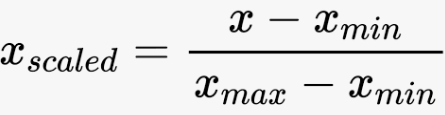

33.png

In [36]:
from sklearn.preprocessing import MinMaxScaler

34.png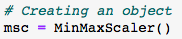

In [37]:
msc = MinMaxScaler()

35.png

In [38]:
data1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

36.png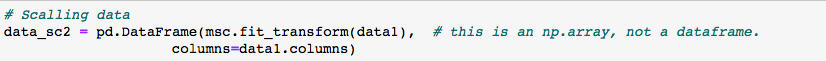

In [39]:
data_sc2 = pd.DataFrame(msc.fit_transform(data1), columns=data1.columns)

37.png

In [40]:
data_sc2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.099338,0.693333


38.png

In [41]:
data_sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


39.png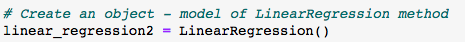

In [42]:
linear_regression2 = LinearRegression()

40.png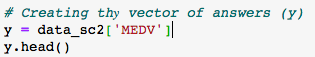

In [43]:
y = data_sc2["MEDV"]
y.head()

0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
Name: MEDV, dtype: float64

41.png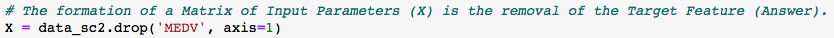

In [44]:
X = data_sc2.drop("MEDV", axis=1)

42.png

In [45]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.099338


In [46]:
# the number of rows of both matrixes has to be the same

In [47]:
X.shape, y.shape

((506, 12), (506,))

### Second training with normalisation

- We feed the normalised training data to the model and the training will begin
- %time - measure time
- X  - inputs
- y  - outputs


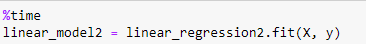

In [ ]:
%time
linear_model2 = linear_regression2.fit(X, y)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 5.72 μs


### Prediction (with normalisation)

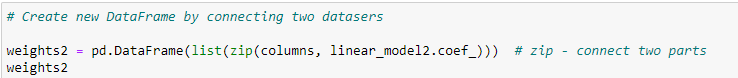

In [49]:
weights = pd.DataFrame(list(zip(columns, linear_model2.coef_)))
weights

,0,1
0,CRIM,-0.239998
1,ZN,0.104363
2,INDUS,0.008164
3,CHAS,0.063111
4,NOX,-0.202587
5,RM,0.424261
6,AGE,0.007791
7,DIS,-0.364304
8,RAD,0.147918
9,TAX,-0.147675


In [50]:
# The weights of the normalised model clearly show the effect of each feature on the result

# from strong negative correlation: -1
# to strong positive correlation:   +1


47.png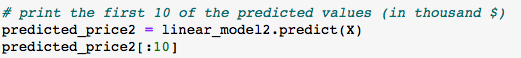

In [51]:
predicted_price2 = linear_model2.predict(X)
predicted_price2[:10]

array([0.55630529, 0.44570742, 0.5690708 , 0.52615954, 0.50952869,
       0.45318152, 0.39566581, 0.315533  , 0.13508844, 0.30488154])

### Printing the result graph with normalisation¶

48.png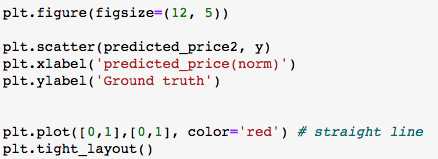

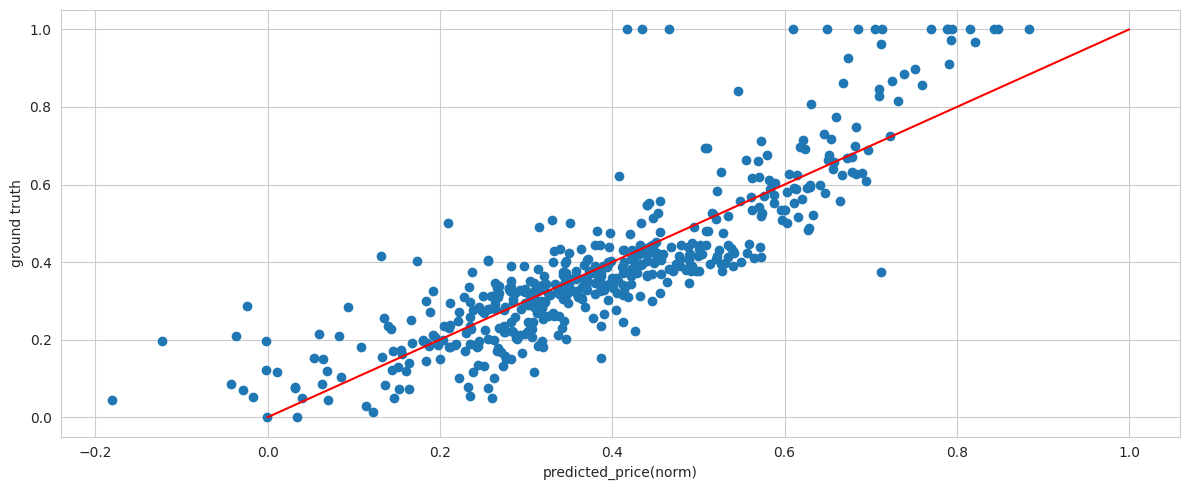

In [52]:
plt.figure(figsize=(12, 5))

plt.scatter(predicted_price2, y)
plt.xlabel('predicted_price(norm)')
plt.ylabel('ground truth')

plt.plot([0,1],[0,1], color='red')
plt.tight_layout()

In [53]:
# The result looks like the same. Why? Print your ideas

### Model evaluation for training set

50.png

In [54]:
from sklearn.model_selection import train_test_split

51.png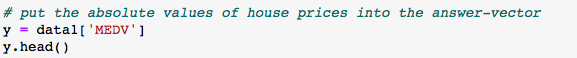

In [55]:
y = data1['MEDV']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

52.png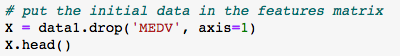

In [56]:
X = data1.drop('MEDV', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


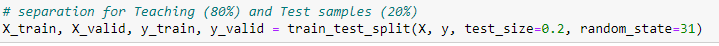

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=31)

54.png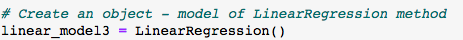

In [58]:
linear_model3 = LinearRegression()

In [59]:
# Since there are several independent variables in the model, we cannot display their dependence in 
# two-dimensional space, but we can plot the relationship between the residual model and the predicted values, 
# which will also help us diagnose the quality of the model. This is called a ResidualsPlot. 
# It shows non-linearity and outliers, as well as the randomness of the error distribution.


55.png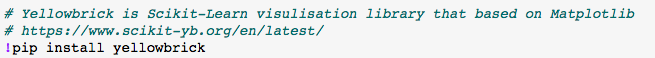

In [60]:
!pip install yellowbrick

56.png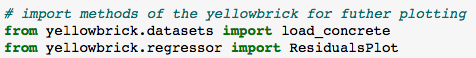

In [61]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

57.png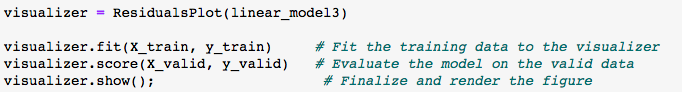

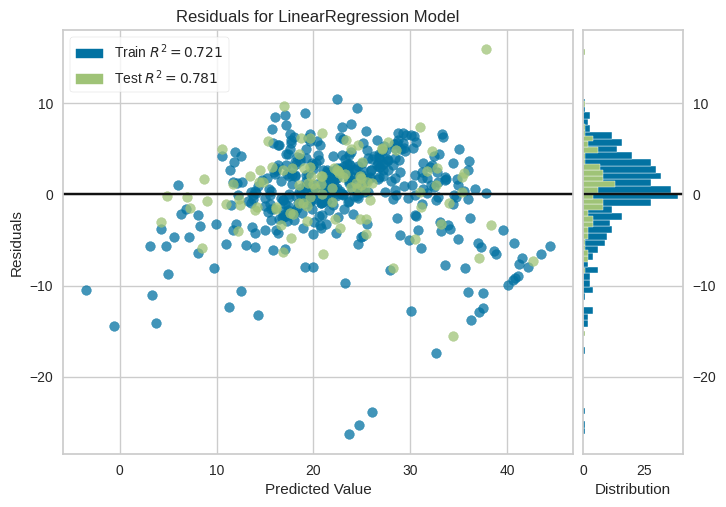

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [65]:
visualizer = ResidualsPlot(linear_model3)

visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
visualizer.show()

In [62]:
# R2 - Coefficient of determination
# It is considered as a universal measure of the dependence of one random variable on many others


#### Explain the results by typing in two or three sentences

## LASSO - Least Absolute Shrinkage and Selection Operator

In [63]:
# LASSO-regression serves as a method for selecting traits. Not all signs are used to build the model, 
# but only important ones. Thus, we reduce the computational burden. This is important for more massive datasets.


**First, we will train Lasso regression with a small coefficient $\alpha$ (weak regularization).**

Only the coefficient at the sign of NOX (concentration of nitrogen oxides) is reset. This means that it is the least important for predicting the target attribute - the median value of houses in the area:**



Just FYI (For your information)
$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ – hyperplane equation depending on model parameters $w$, $\ell$-the number of objects in the sample $X$, $d$ – number of features, $y$ – target attribute values, $\alpha$ – regularization coefficient.


58.png

In [66]:
from sklearn.linear_model import LassoCV, Lasso

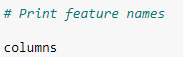

In [67]:
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

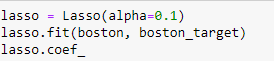

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(boston, boston_target)
lasso.coef_

In [64]:
# NOX (concentration of nitrogen oxides) = 0 !

**Let's train Lasso regression with coefficient 𝛼 = 10. Now, we have only 3 non-zero coefficients**

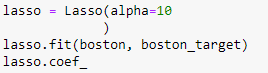

In [68]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.12579892,  0.03977314, -0.06763157,  1.14881187, -0.        ,
        3.7571151 , -0.0145253 , -1.19566946,  0.24015581, -0.01265588,
       -0.76526949, -0.59027902])

#### Explain the results by typing in two or three sentences

### Thus, Lasso regression serves as a method for selecting features